<a href="https://colab.research.google.com/github/2PUMA2/Elderly-Driver-Accident-Severity-Prediction/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5%EC%9E%85%EB%AC%B8_14%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 불러오기

In [ ]:
import pandas as pd

# 파일 경로 설정
file_path = '/content/drive/MyDrive/elder car accident.csv'
file_speed = '/content/drive/MyDrive/차량통행속도_18-23.csv'

# 데이터 로드
data = pd.read_csv(file_path)
speed = pd.read_csv(file_speed)

# 데이터 확인
data

,사고번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도
0,2018010100100002,2018년 1월,월요일,서울특별시 강동구 강일동,중상사고,0,1,1,0,차대차 - 충돌,...,흐림,교차로 - 교차로안,승용,남,65세 이상,상해없음,화물,남,51-60세,경상
1,2018010100100026,2018년 1월,월요일,서울특별시 강남구 신사동,경상사고,0,0,1,0,차대차 - 추돌,...,맑음,교차로 - 교차로안,승용,남,65세 이상,상해없음,승용,남,61-64세,경상
2,2018010100100294,2018년 1월,월요일,서울특별시 은평구 대조동,경상사고,0,0,1,0,차대사람 - 길가장자리구역통행중,...,맑음,단일로 - 기타,승용,남,65세 이상,상해없음,보행자,남,21-30세,경상
3,2018010100100424,2018년 1월,월요일,서울특별시 강남구 일원동,경상사고,0,0,1,1,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,65세 이상,상해없음,승용,남,51-60세,경상
4,2018010200100132,2018년 1월,화요일,서울특별시 강남구 압구정동,경상사고,0,0,1,0,차대차 - 충돌,...,맑음,단일로 - 기타,승용,남,65세 이상,상해없음,원동기,남,31-40세,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35314,2023123100100089,2023년 12월,일요일,서울특별시 종로구 종로3가,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,승용,남,65세 이상,상해없음,보행자,남,21-30세,경상
35315,2023123100100092,2023년 12월,일요일,서울특별시 송파구 장지동,경상사고,0,0,2,0,차대차 - 추돌,...,맑음,단일로 - 기타,승용,남,65세 이상,상해없음,승용,남,51-60세,경상
35316,2023123100100115,2023년 12월,일요일,서울특별시 강북구 수유동,부상신고사고,0,0,0,1,차대차 - 기타,...,맑음,단일로 - 기타,자전거,남,65세 이상,부상신고,이륜,남,31-40세,상해없음
35317,2023123100100141,2023년 12월,일요일,서울특별시 영등포구 당산동1가,경상사고,0,0,1,0,차대차 - 충돌,...,맑음,교차로 - 교차로안,승용,남,65세 이상,상해없음,승합,남,41-50세,경상


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35319 entries, 0 to 35318
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        35319 non-null  int64 
 1   발생년월        35319 non-null  object
 2   요일          35319 non-null  object
 3   시군구         35319 non-null  object
 4   사고내용        35319 non-null  object
 5   사망자수        35319 non-null  int64 
 6   중상자수        35319 non-null  int64 
 7   경상자수        35319 non-null  int64 
 8   부상신고자수      35319 non-null  int64 
 9   사고유형        35319 non-null  object
 10  법규위반        35319 non-null  object
 11  노면상태        35319 non-null  object
 12  기상상태        35319 non-null  object
 13  도로형태        35319 non-null  object
 14  가해운전자 차종    35319 non-null  object
 15  가해운전자 성별    35319 non-null  object
 16  가해운전자 연령대   35319 non-null  object
 17  가해운전자 상해정도  35319 non-null  object
 18  피해운전자 차종    34328 non-null  object
 19  피해운전자 성별    34328 non-null  object
 20  피해운전자 

# 중복 행 제거

In [ ]:
# 중복 행 제거
data = data.drop_duplicates()

# 중복 행 제거 후 데이터 확인
print(data.shape)  # 데이터의 크기 확인 (행과 열의 개수)

(35319, 22)


# 결측값 처리

In [ ]:
# 1. 결측값 확인 및 처리

# 결측값으로 간주할 값들 정의
missing_values = ['?', 'None', 'NA', 'NaN', 'null', '']

data.replace(missing_values, pd.NA, inplace=True)

# 결측값 확인
print(data.isnull().sum())

사고번호            0
발생년월            0
요일              0
시군구             0
사고내용            0
사망자수            0
중상자수            0
경상자수            0
부상신고자수          0
사고유형            0
법규위반            0
노면상태            0
기상상태            0
도로형태            0
가해운전자 차종        0
가해운전자 성별        0
가해운전자 연령대       0
가해운전자 상해정도      0
피해운전자 차종      991
피해운전자 성별      991
피해운전자 연령대     991
피해운전자 상해정도    991
dtype: int64


In [ ]:
#결측치가 아닌 피해운전자가 없는 사고로 보임
#피해운전자 상해 정도는 사고심각도로 볼 수 있는 변수라 생각해 추후에 삭제 예정
data[data.isna().any(axis=1)]['사고유형'].value_counts()

,count
사고유형,
차량단독 - 기타,706
차량단독 - 충돌,230
차량단독 - 전도전복,48
차량단독 - 도로외이탈 - 추락,6
차량단독 - 도로외이탈 - 기타,1


In [ ]:
# 피해자가 없으므로 정보 없음 (차량 단독) 값으로 분류
data['피해운전자 차종'] = data['피해운전자 차종'].fillna('정보 없음 (차량 단독)')
data['피해운전자 성별'] = data['피해운전자 성별'].fillna('정보 없음 (차량 단독)')
data['피해운전자 연령대'] = data['피해운전자 연령대'].fillna('정보 없음 (차량 단독)')
data['피해운전자 상해정도'] = data['피해운전자 상해정도'].fillna('정보 없음 (차량 단독)') # 추후 삭제할 컬럼이지만 혹시나 eda할 것을 고려해 일단 대체

In [ ]:
# 결측값 대체 확인
print(data.isnull().sum())

사고번호          0
발생년월          0
요일            0
시군구           0
사고내용          0
사망자수          0
중상자수          0
경상자수          0
부상신고자수        0
사고유형          0
법규위반          0
노면상태          0
기상상태          0
도로형태          0
가해운전자 차종      0
가해운전자 성별      0
가해운전자 연령대     0
가해운전자 상해정도    0
피해운전자 차종      0
피해운전자 성별      0
피해운전자 연령대     0
피해운전자 상해정도    0
dtype: int64


# 컬럼 정리

In [ ]:
data.columns

Index(['사고번호', '발생년월', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령대', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령대',
       '피해운전자 상해정도'],
      dtype='object')

## 시군구 분리

In [ ]:
#평균속도 구하는데 구 컬럼이 필요
#시군구 데이터를 시 군 구로 분할
pat = r'(\S+) (\S+) (\S+)'
data[['시', '구', '동']] = data['시군구'].str.extract(pat)
data = data[data['구'] != '미분류']

## 공휴일 컬럼 추가

In [ ]:
#사고번호에서 발생년월일 공휴일 추출
import holidays

kr_holidays = holidays.KR()

data['발생년월일'] = pd.to_datetime(data['사고번호'].astype(str).str[:8], format='%Y%m%d', errors='coerce')
data['연'] = data['발생년월일'].dt.year
data['월'] = data['발생년월일'].dt.month
data['일'] = data['발생년월일'].dt.day
data['발생년월'] = data['발생년월일'].dt.strftime('%Y-%m')
data['공휴일'] = data['발생년월일'].apply(lambda x : int(x in kr_holidays))

## 월별 구별 평균속도 컬럼 추가

In [ ]:
speed.columns = ['구분별(1)', '구분별(2)'] + [pd.to_datetime(col, format='%Y. %m', errors='coerce').strftime('%Y-%m') for col in speed.columns[2:]]

In [ ]:
#특정년도-특정월 특정구의 평균속도 컬럼 추가
for i, row in data.iterrows():
    for j, speed_row in speed.iterrows():
        if row['구'] == speed_row['구분별(2)']:
            column_name = row['발생년월']
            if column_name in speed.columns:
                data.at[i, '평균속도'] = speed_row[column_name]

## 월, 일 주기성 반영

In [ ]:
import numpy as np
data['sinmonth'] = -np.sin(2 * np.pi * data['월']/12.0)
data['cosmonth'] = -np.cos(2 * np.pi * data['월']/12.0)
data['sindate'] = -np.sin(2 * np.pi * (data['월']+data['일']/31)/12)
data['cosdate'] = -np.sin(2 * np.pi * (data['월']+data['일']/31)/12)

## 주말 컬럼 추가

In [ ]:
data['요일'].unique()

array(['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'], dtype=object)

In [ ]:
# 요일 데이터는 주중과 주말 변수로 생성
# '요일' 열을 기반으로 '주중'과 '주말'을 구분하는 함수
def categorize_day(weekday):
    if weekday in ['월요일', '화요일', '수요일', '목요일', '금요일']:
        return '주중'
    else:
        return '주말'

# '요일' 열을 주중/주말로 분리하여 새로운 열 '주말 여부' 추가
data.loc[:, '주말여부'] = data['요일'].apply(categorize_day)


# 계절별 사고 수 계산
weekend_counts = data.groupby('주말여부').size()

# 결과 출력
print(weekend_counts)

주말여부
주말     8203
주중    27115
dtype: int64


## 사고유형 분리

In [ ]:
data['사고유형'].value_counts()

,count
사고유형,
차대차 - 충돌,13539
차대차 - 기타,7837
차대차 - 추돌,4726
차대사람 - 기타,3442
차대사람 - 횡단중,2887
차대사람 - 차도통행중,821
차량단독 - 기타,706
차대사람 - 보도통행중,542
차대사람 - 길가장자리구역통행중,522


In [ ]:
# 사고유형_2 ( - 기준으로 2개로 분리)
# - 가 2개인 경우 첫 번째 '-'를 기준으로 분리
data[['사고유형1', '사고유형2']] = data['사고유형'].str.split(' - ', n=1, expand=True)

In [ ]:
# 그대로 사용
data['사고유형1'].value_counts()

,count
사고유형1,
차대차,26102
차대사람,8214
차량단독,1002


In [ ]:
# 그대로 사용
data['사고유형2'].value_counts()

,count
사고유형2,
충돌,13769
기타,11985
추돌,4726
횡단중,2887
차도통행중,821
보도통행중,542
길가장자리구역통행중,522
전도전복,59
도로외이탈 - 추락,6


## 기상상태

In [ ]:
# 기상상태
data['기상상태'].value_counts()

,count
기상상태,
맑음,31498
비,1970
흐림,1302
기타,461
눈,83
안개,4


In [ ]:
# 수가 적은 안개의 경우 흐림과 묶어 하나로 변경
data['기상상태'] = data['기상상태'].replace({
    '흐림': '흐림, 안개',
    '안개': '흐림, 안개'
})

## 노면상태

In [ ]:
data['노면상태'].value_counts()

,count
노면상태,
건조,32070
젖음/습기,2593
기타,542
서리/결빙,67
적설,41
해빙,3
침수,2


In [ ]:
# 노면상태에서 수가 적은 항목의 경우 묶어 하나로 변경
data['노면상태'] = data['노면상태'].replace({
    '젖음/습기': '젖음/습기/침수',
    '침수': '젖음/습기/침수',
    '서리/결빙': '서리/결빙/적설/해빙',
    '적설': '서리/결빙/적설/해빙',
    '해빙': '서리/결빙/적설/해빙'
})

## 법규위반 그대로

In [ ]:
# 법규위반은 그대로 사용
data['법규위반'].value_counts()

,count
법규위반,
안전운전불이행,19050
안전거리미확보,5448
신호위반,4227
기타,1471
보행자보호의무위반,1444
교차로운행방법위반,1265
중앙선침범,879
차로위반,632
직진우회전진행방해,592


## 도로형태 분리

In [ ]:
# 도로형태 데이터 분리
pat =  r'(.+) - (.+)'
data[['도로형태1', '도로형태2']] = data['도로형태'].str.extract(pat)

data['도로형태1'].value_counts()

,count
도로형태1,
단일로,17797
교차로,15157
기타,2218
주차장,119
미분류,27


In [ ]:
data['도로형태1'] = data['도로형태1'].replace({
    '기타': '기타/미분류',
    '미분류': '기타/미분류'
})

In [ ]:
data['도로형태2'].value_counts()

,count
도로형태2,
기타,19268
교차로안,8428
교차로부근,5233
교차로횡단보도내,1496
지하차도(도로)내,267
교량,251
고가도로위,139
주차장,119
터널,90


## 가해운전자 성별 그대로

In [ ]:
# 가해운전자 성별은 그대로 사용
data['가해운전자 성별'].value_counts()

,count
가해운전자 성별,
남,31640
여,3678


## 피해운전자 연령대 - 기타불명 값 최빈값 대체

In [ ]:
data['피해운전자 연령대'].value_counts()

,count
피해운전자 연령대,
31-40세,7283
41-50세,6521
51-60세,6405
21-30세,5649
65세 이상,4625
61-64세,2325
13-20세,1008
정보 없음 (차량 단독),991
12세 이하,430


In [ ]:
# 기타불명의 값만 최빈값으로 대체
m = data.loc[data['피해운전자 연령대'] != '기타불명', '피해운전자 연령대'].mode()[0]

data['피해운전자 연령대'] = data['피해운전자 연령대'].replace('기타불명', m)

# 나머지는 그대로

## 가해운전자 차종

In [ ]:
data['가해운전자 차종'].value_counts()

,count
가해운전자 차종,
승용,26176
화물,2810
승합,2424
자전거,2046
이륜,1304
원동기,227
건설기계,173
기타불명,71
개인형이동수단(PM),55


In [ ]:
data.loc[data['가해운전자 차종'].isin(['사륜오토바이(ATV)', '특수', '기타불명']), '가해운전자 차종'] = '기타'

## 피해운전자 차종

In [ ]:
data['피해운전자 차종'].value_counts()

,count
피해운전자 차종,
승용,15613
보행자,8214
이륜,4913
화물,1552
승합,1536
자전거,1469
정보 없음 (차량 단독),991
원동기,634
건설기계,125


In [ ]:
data.loc[data['피해운전자 차종'].isin(['농기계', '사륜오토바이(ATV)', '미분류', '특수', '기타불명']), '피해운전자 차종'] = '기타'

## 타겟컬럼 사고심각도 생성

In [ ]:
# 사망, 중상 사고 1, 나머지 0
import numpy as np
data['사고심각도'] = np.where((data['사고내용'] == '중상사고') | (data['사고내용'] == '사망사고'), 1, 0)
data['사고심각도'].value_counts()

,count
사고심각도,
0,26757
1,8561


## 동별로 클러스터링하여 군집화

In [ ]:
df_dummies = pd.get_dummies(data[['동', '사고유형1', '도로형태2']], columns=['사고유형1', '도로형태2'])

# 2. 동별로 더미 변수 집계
features = df_dummies.groupby('동').sum()
features

,사고유형1_차대사람,사고유형1_차대차,사고유형1_차량단독,도로형태2_고가도로위,도로형태2_교량,도로형태2_교차로부근,도로형태2_교차로안,도로형태2_교차로횡단보도내,도로형태2_기타,도로형태2_미분류,도로형태2_주차장,도로형태2_지하차도(도로)내,도로형태2_터널
동,,,,,,,,,,,,,
가락동,52,283,7,0,2,69,95,15,160,0,1,0,0
가리봉동,11,69,4,3,0,11,23,4,43,0,0,0,0
가산동,36,117,8,1,7,22,33,8,90,0,0,0,0
가양동,17,96,2,1,0,22,26,7,59,0,0,0,0
가회동,0,2,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
후암동,12,10,0,0,0,3,6,1,11,0,1,0,0
훈정동,1,0,0,0,0,0,0,0,1,0,0,0,0
휘경동,31,128,4,0,1,25,38,7,92,0,0,0,0


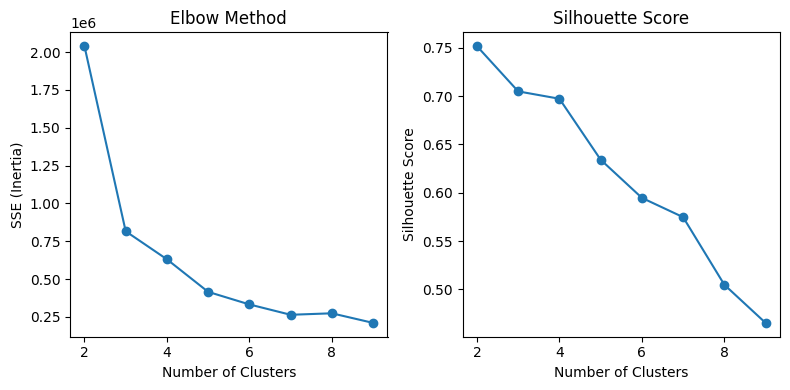

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# 3. 최적의 군집 수 찾기 (Elbow Method 및 Silhouette Score)
elbow_scores = []
silhouette_scores = []
k_values = range(2, 10)  # 군집 수 범위 설정 (2부터 동 개수까지)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    elbow_scores.append(kmeans.inertia_)  # SSE 값 저장
    silhouette_scores.append(silhouette_score(features, cluster_labels))  # Silhouette Score 저장

# 4. Elbow Method 시각화
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, elbow_scores, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')

# 5. Silhouette Score 시각화
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
features['군집'] = kmeans.fit_predict(features)
data = data.merge(features[['군집']], on='동', how='left')

In [ ]:
data['군집'] = data['군집'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35318 entries, 0 to 35317
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   사고번호        35318 non-null  int64         
 1   발생년월        35318 non-null  object        
 2   요일          35318 non-null  object        
 3   시군구         35318 non-null  object        
 4   사고내용        35318 non-null  object        
 5   사망자수        35318 non-null  int64         
 6   중상자수        35318 non-null  int64         
 7   경상자수        35318 non-null  int64         
 8   부상신고자수      35318 non-null  int64         
 9   사고유형        35318 non-null  object        
 10  법규위반        35318 non-null  object        
 11  노면상태        35318 non-null  object        
 12  기상상태        35318 non-null  object        
 13  도로형태        35318 non-null  object        
 14  가해운전자 차종    35318 non-null  object        
 15  가해운전자 성별    35318 non-null  object        
 16  가해운전자 연령대   35318 non-

## LightGBM 특성 중요도 출력 위해서 컬럼 이름 속 띄어쓰기 삭제

In [ ]:
# 컬럼에 띄어쓰기 삭제
# LightGBM 특성 중요도 위해
data = data.rename(columns={'가해운전자 차종': '가해운전자차종', '가해운전자 성별': '가해운전자성별',
                            '피해운전자 차종':'피해운전자차종', '피해운전자 연령대':'피해운전자연령대', '주말 여부': '주말여부'})

## 필요없는 컬럼 삭제

In [ ]:
# 삭제할 셀들 한번에 지우는 코드
data = data.drop(columns=['사고번호', '발생년월','발생년월일', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수','부상신고자수','시',
                           '가해운전자 연령대', '가해운전자 상해정도', '피해운전자 성별', '피해운전자 상해정도', '연', '동',
                          '도로형태', '사고유형'])
data

,법규위반,노면상태,기상상태,가해운전자차종,가해운전자성별,피해운전자차종,피해운전자연령대,구,월,일,...,cosmonth,sindate,cosdate,주말여부,사고유형1,사고유형2,도로형태1,도로형태2,사고심각도,군집
0,안전운전불이행,건조,"흐림, 안개",승용,남,화물,51-60세,강동구,1,1,...,-0.866025,-0.514555,-0.514555,주중,차대차,충돌,교차로,교차로안,1,1
1,안전운전불이행,건조,맑음,승용,남,승용,61-64세,강남구,1,1,...,-0.866025,-0.514555,-0.514555,주중,차대차,추돌,교차로,교차로안,0,2
2,안전운전불이행,건조,맑음,승용,남,보행자,21-30세,은평구,1,1,...,-0.866025,-0.514555,-0.514555,주중,차대사람,길가장자리구역통행중,단일로,기타,0,0
3,중앙선침범,건조,맑음,승용,남,승용,51-60세,강남구,1,1,...,-0.866025,-0.514555,-0.514555,주중,차대차,기타,단일로,기타,0,0
4,안전거리미확보,건조,맑음,승용,남,원동기,31-40세,강남구,1,2,...,-0.866025,-0.528964,-0.528964,주중,차대차,충돌,단일로,기타,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35313,보행자보호의무위반,건조,맑음,승용,남,보행자,21-30세,종로구,12,31,...,-1.000000,-0.500000,-0.500000,주말,차대사람,횡단중,교차로,교차로횡단보도내,0,1
35314,안전운전불이행,건조,맑음,승용,남,승용,51-60세,송파구,12,31,...,-1.000000,-0.500000,-0.500000,주말,차대차,추돌,단일로,기타,0,0
35315,안전운전불이행,젖음/습기/침수,맑음,자전거,남,이륜,31-40세,강북구,12,31,...,-1.000000,-0.500000,-0.500000,주말,차대차,기타,단일로,기타,0,2
35316,교차로운행방법위반,건조,맑음,승용,남,승합,41-50세,영등포구,12,31,...,-1.000000,-0.500000,-0.500000,주말,차대차,충돌,교차로,교차로안,0,1


## 크래머 v 계수

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seabo

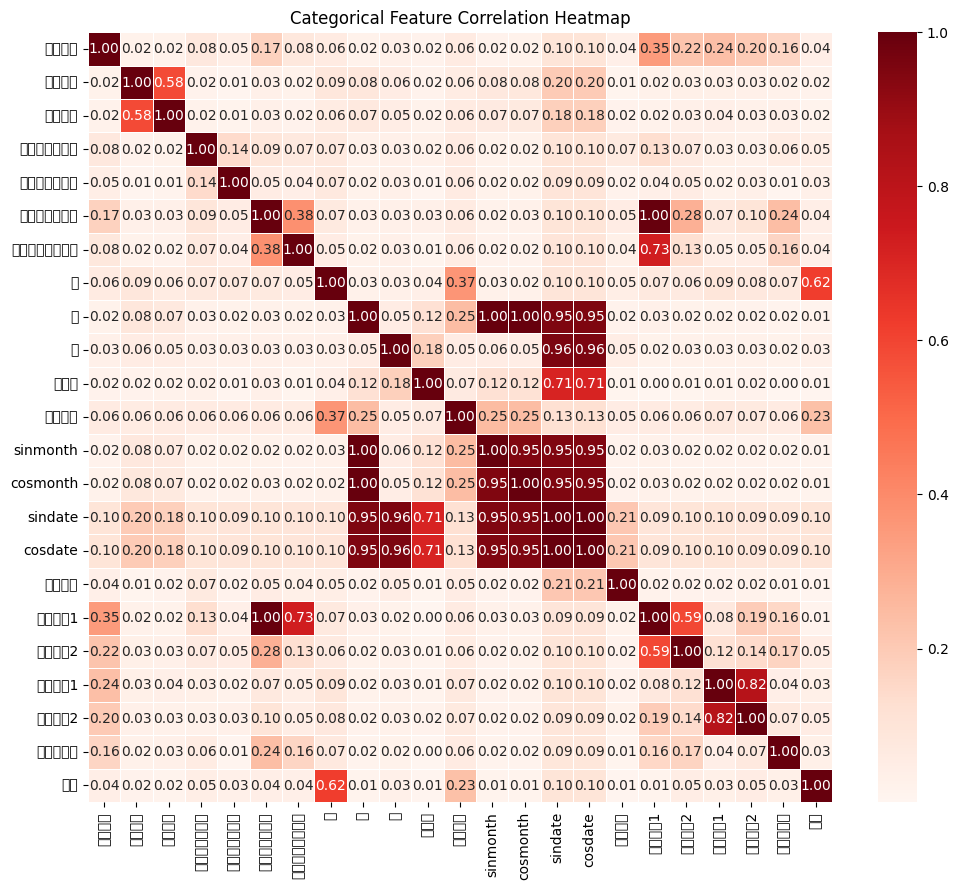

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

# Cramér's V 계산 함수
def cramers_v(chi2, n, min_dim):
    """Calculate Cramér's V."""
    return np.sqrt(chi2 / (n * min_dim))

# 범주형 변수 간 상관관계 계산 함수
def calculate_categorical_correlations(df):
    cols = df.columns
    n = len(df)  # 샘플 수
    correlation_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))),
                                      index=cols, columns=cols)

    # 각 변수 조합에 대해 Cramér's V 계산
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                correlation_matrix.loc[col1, col2] = 1.0  # 자기 상관은 1
            else:
                contingency_table = pd.crosstab(df[col1], df[col2])
                chi2, _, _, _ = chi2_contingency(contingency_table)
                min_dim = min(contingency_table.shape) - 1
                correlation_matrix.loc[col1, col2] = cramers_v(chi2, n, min_dim)

    return correlation_matrix

# 상관관계 계산
correlation_matrix = calculate_categorical_correlations(data)

# Heatmap으로 상관관계 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f', linewidths=.5)
plt.title('Categorical Feature Correlation Heatmap')
plt.show()

### feature 간 상관관계

In [ ]:
# 상관계수 기준에 맞는 변수 쌍 출력 함수 (완전 중복 제거)
def filter_high_correlations_no_duplicates(correlation_matrix, threshold=0.5):
    seen_pairs = set()  # 이미 확인한 변수 쌍 저장
    high_correlations = []

    for col1 in correlation_matrix.columns:
        for col2 in correlation_matrix.index:
            if col1 != col2 and correlation_matrix.loc[col1, col2] > threshold:
                # 정렬하여 쌍을 고유하게 표현
                pair = tuple(sorted([col1, col2]))
                if pair not in seen_pairs:  # 중복 쌍인지 확인
                    seen_pairs.add(pair)
                    high_correlations.append((pair[0], pair[1], correlation_matrix.loc[col1, col2]))

    # 상관계수 기준으로 결과 내림차순 정렬
    high_correlations = sorted(high_correlations, key=lambda x: -x[2])

    # DataFrame으로 반환
    return pd.DataFrame(high_correlations, columns=["Variable 1", "Variable 2", "Correlation"])

# 상관계수 기준에 맞는 변수 쌍 필터링 (완전 중복 제거)
filtered_correlations = filter_high_correlations_no_duplicates(correlation_matrix, threshold=0.5)

# 결과 출력
print(filtered_correlations)

   Variable 1 Variable 2  Correlation
0    sinmonth          월     1.000000
1    cosmonth          월     1.000000
2     cosdate    sindate     1.000000
3       사고유형1    피해운전자차종     0.997352
4     sindate          일     0.955142
5     cosdate          일     0.955142
6    cosmonth    sindate     0.952565
7     cosdate   cosmonth     0.952565
8     sindate          월     0.949568
9     cosdate          월     0.949568
10   cosmonth   sinmonth     0.948683
11    sindate   sinmonth     0.947127
12    cosdate   sinmonth     0.947127
13      도로형태1      도로형태2     0.819649
14      사고유형1   피해운전자연령대     0.731178
15    sindate        공휴일     0.710902
16    cosdate        공휴일     0.710902
17          구         군집     0.617747
18      사고유형1      사고유형2     0.591580
19       기상상태       노면상태     0.583159


### 크래머 v 계수 보고 처리

In [ ]:
# 새로운 변수 생성 (기상상태-노면상태 결합)
data['기상노면상태'] = data['기상상태'] + '-' + data['노면상태']
data = data.drop(columns=['기상상태', '노면상태'])

# 결과 출력
data

,법규위반,가해운전자차종,가해운전자성별,피해운전자차종,피해운전자연령대,구,월,일,공휴일,평균속도,...,sindate,cosdate,주말여부,사고유형1,사고유형2,도로형태1,도로형태2,사고심각도,군집,기상노면상태
0,안전운전불이행,승용,남,화물,51-60세,강동구,1,1,1,24.5,...,-0.514555,-0.514555,주중,차대차,충돌,교차로,교차로안,1,1,"흐림, 안개-건조"
1,안전운전불이행,승용,남,승용,61-64세,강남구,1,1,1,24.7,...,-0.514555,-0.514555,주중,차대차,추돌,교차로,교차로안,0,2,맑음-건조
2,안전운전불이행,승용,남,보행자,21-30세,은평구,1,1,1,22.4,...,-0.514555,-0.514555,주중,차대사람,길가장자리구역통행중,단일로,기타,0,0,맑음-건조
3,중앙선침범,승용,남,승용,51-60세,강남구,1,1,1,24.7,...,-0.514555,-0.514555,주중,차대차,기타,단일로,기타,0,0,맑음-건조
4,안전거리미확보,승용,남,원동기,31-40세,강남구,1,2,0,24.7,...,-0.528964,-0.528964,주중,차대차,충돌,단일로,기타,0,0,맑음-건조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35313,보행자보호의무위반,승용,남,보행자,21-30세,종로구,12,31,0,21.8,...,-0.500000,-0.500000,주말,차대사람,횡단중,교차로,교차로횡단보도내,0,1,맑음-건조
35314,안전운전불이행,승용,남,승용,51-60세,송파구,12,31,0,22.1,...,-0.500000,-0.500000,주말,차대차,추돌,단일로,기타,0,0,맑음-건조
35315,안전운전불이행,자전거,남,이륜,31-40세,강북구,12,31,0,19.8,...,-0.500000,-0.500000,주말,차대차,기타,단일로,기타,0,2,맑음-젖음/습기/침수
35316,교차로운행방법위반,승용,남,승합,41-50세,영등포구,12,31,0,22.3,...,-0.500000,-0.500000,주말,차대차,충돌,교차로,교차로안,0,1,맑음-건조


In [ ]:
data = data.drop(columns=['구','사고유형1', '도로형태1', '일','월'])
data

,법규위반,가해운전자차종,가해운전자성별,피해운전자차종,피해운전자연령대,공휴일,평균속도,sinmonth,cosmonth,sindate,cosdate,주말여부,사고유형2,도로형태2,사고심각도,군집,기상노면상태
0,안전운전불이행,승용,남,화물,51-60세,1,24.5,-5.000000e-01,-0.866025,-0.514555,-0.514555,주중,충돌,교차로안,1,1,"흐림, 안개-건조"
1,안전운전불이행,승용,남,승용,61-64세,1,24.7,-5.000000e-01,-0.866025,-0.514555,-0.514555,주중,추돌,교차로안,0,2,맑음-건조
2,안전운전불이행,승용,남,보행자,21-30세,1,22.4,-5.000000e-01,-0.866025,-0.514555,-0.514555,주중,길가장자리구역통행중,기타,0,0,맑음-건조
3,중앙선침범,승용,남,승용,51-60세,1,24.7,-5.000000e-01,-0.866025,-0.514555,-0.514555,주중,기타,기타,0,0,맑음-건조
4,안전거리미확보,승용,남,원동기,31-40세,0,24.7,-5.000000e-01,-0.866025,-0.528964,-0.528964,주중,충돌,기타,0,0,맑음-건조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35313,보행자보호의무위반,승용,남,보행자,21-30세,0,21.8,2.449294e-16,-1.000000,-0.500000,-0.500000,주말,횡단중,교차로횡단보도내,0,1,맑음-건조
35314,안전운전불이행,승용,남,승용,51-60세,0,22.1,2.449294e-16,-1.000000,-0.500000,-0.500000,주말,추돌,기타,0,0,맑음-건조
35315,안전운전불이행,자전거,남,이륜,31-40세,0,19.8,2.449294e-16,-1.000000,-0.500000,-0.500000,주말,기타,기타,0,2,맑음-젖음/습기/침수
35316,교차로운행방법위반,승용,남,승합,41-50세,0,22.3,2.449294e-16,-1.000000,-0.500000,-0.500000,주말,충돌,교차로안,0,1,맑음-건조


In [ ]:
data['기상노면상태'].value_counts()

,count
기상노면상태,
맑음-건조,30869
비-젖음/습기/침수,1958
"흐림, 안개-건조",873
"흐림, 안개-젖음/습기/침수",400
맑음-기타,390
기타-건조,328
맑음-젖음/습기/침수,189
기타-기타,123
맑음-서리/결빙/적설/해빙,50


In [ ]:
data.columns

Index(['법규위반', '가해운전자차종', '가해운전자성별', '피해운전자차종', '피해운전자연령대', '공휴일', '평균속도',
       'sinmonth', 'cosmonth', 'sindate', 'cosdate', '주말여부', '사고유형2', '도로형태2',
       '사고심각도', '군집', '기상노면상태'],
      dtype='object')

# train / test split (8:2)

In [ ]:
from sklearn.model_selection import train_test_split

# 타겟 비율 확인
print(data['사고심각도'].value_counts(normalize=True))

# Train-Test Split (타겟 비율 유지 + 데이터 셔플링)
train, test = train_test_split(
    data,
    test_size=0.2,  # 테스트 데이터의 비율 (20%)
    random_state=42,  # 재현성을 위한 시드값
    shuffle=True,  # 데이터 섞기
    stratify=data['사고심각도']  # 타겟 비율 유지
)

# 결과 확인
print("Train Target Distribution: \n")
print(train['사고심각도'].value_counts(normalize=True))

print("Test Target Distribution: \n")
print(test['사고심각도'].value_counts(normalize=True))


사고심각도
0    0.757602
1    0.242398
Name: proportion, dtype: float64
Train Target Distribution: 

사고심각도
0    0.757592
1    0.242408
Name: proportion, dtype: float64
Test Target Distribution: 

사고심각도
0    0.757644
1    0.242356
Name: proportion, dtype: float64


In [ ]:
X_train = train.drop(columns = ['사고심각도'])
y_train = train['사고심각도']

X_test = test.drop(columns = ['사고심각도'])
y_test = test['사고심각도']

In [ ]:
X_train

,법규위반,가해운전자차종,가해운전자성별,피해운전자차종,피해운전자연령대,공휴일,평균속도,sinmonth,cosmonth,sindate,cosdate,주말여부,사고유형2,도로형태2,군집,기상노면상태
10895,안전운전불이행,승용,여,보행자,51-60세,0,24.6,5.000000e-01,-8.660254e-01,0.315435,0.315435,주중,횡단중,기타,2,맑음-건조
18528,안전운전불이행,화물,남,승용,41-50세,0,22.3,-8.660254e-01,5.000000e-01,-0.713053,-0.713053,주중,기타,기타,2,맑음-건조
33259,안전운전불이행,승용,남,보행자,61-64세,0,24.5,1.000000e+00,1.836970e-16,0.925487,0.925487,주말,차도통행중,교차로안,0,맑음-건조
14311,안전운전불이행,승용,남,이륜,65세 이상,0,23.3,-1.224647e-16,1.000000e+00,0.470465,0.470465,주중,기타,교차로안,2,맑음-건조
22527,안전운전불이행,승용,남,보행자,51-60세,0,22.0,-5.000000e-01,-8.660254e-01,-0.585049,-0.585049,주중,기타,기타,2,맑음-건조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20015,안전운전불이행,이륜,남,화물,31-40세,0,23.0,5.000000e-01,8.660254e-01,0.801001,0.801001,주말,기타,기타,1,맑음-건조
14788,안전운전불이행,승용,남,이륜,21-30세,0,23.0,5.000000e-01,8.660254e-01,0.857457,0.857457,주중,충돌,교차로안,2,맑음-건조
10286,안전거리미확보,승용,남,승용,51-60세,1,26.0,8.660254e-01,-5.000000e-01,0.780325,0.780325,주중,충돌,기타,1,맑음-건조
8269,신호위반,승용,남,승용,61-64세,0,23.6,-1.224647e-16,1.000000e+00,0.151428,0.151428,주말,충돌,교차로부근,0,맑음-건조


# LightGBM, Catboost 자체 범주형 처리 위해

In [ ]:
from sklearn.utils import resample
import pandas as pd

# 3. Train 데이터에서 소수 클래스와 다수 클래스 분리
train_data = pd.concat([X_train, y_train], axis=1)
minority_class = train_data[train_data['사고심각도'] == 1]
majority_class = train_data[train_data['사고심각도'] == 0]

# 4. 소수 클래스 업샘플링
minority_upsampled = resample(
    minority_class,
    replace=True,                # 복제 허용
    n_samples=len(majority_class),  # 다수 클래스와 동일한 샘플 수로 맞춤
    random_state=42              # 재현성
)

# 5. 업샘플링된 데이터 병합
train_data_upsampled = pd.concat([majority_class, minority_upsampled])

# 6. 다시 X_train과 y_train으로 분리
o_X_train = train_data_upsampled.drop(columns=['사고심각도'])
o_y_train = train_data_upsampled['사고심각도']

o_X_test = X_test.copy()
o_y_test = y_test.copy()

print("\nAfter Upsampling:")
print(o_y_train.value_counts())


After Upsampling:
사고심각도
0    21405
1    21405
Name: count, dtype: int64


In [ ]:
o_X_train

,법규위반,가해운전자차종,가해운전자성별,피해운전자차종,피해운전자연령대,공휴일,평균속도,sinmonth,cosmonth,sindate,cosdate,주말여부,사고유형2,도로형태2,군집,기상노면상태
18528,안전운전불이행,화물,남,승용,41-50세,0,22.3,-8.660254e-01,5.000000e-01,-0.713053,-0.713053,주중,기타,기타,2,맑음-건조
33259,안전운전불이행,승용,남,보행자,61-64세,0,24.5,1.000000e+00,1.836970e-16,0.925487,0.925487,주말,차도통행중,교차로안,0,맑음-건조
14311,안전운전불이행,승용,남,이륜,65세 이상,0,23.3,-1.224647e-16,1.000000e+00,0.470465,0.470465,주중,기타,교차로안,2,맑음-건조
23607,안전거리미확보,승용,남,승용,41-50세,0,25.4,-8.660254e-01,5.000000e-01,-0.857457,-0.857457,주중,충돌,기타,1,맑음-건조
20553,안전운전불이행,승용,남,이륜,41-50세,0,22.0,8.660254e-01,5.000000e-01,0.999857,0.999857,주중,기타,기타,0,"흐림, 안개-건조"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,안전거리미확보,이륜,남,승용,31-40세,0,25.6,-8.660254e-01,-5.000000e-01,-0.982790,-0.982790,주중,충돌,기타,2,맑음-건조
13069,안전운전불이행,이륜,남,승용,61-64세,0,24.2,-8.660254e-01,5.000000e-01,-0.810998,-0.810998,주중,충돌,교차로부근,1,맑음-건조
15398,안전운전불이행,승용,남,보행자,65세 이상,0,23.1,1.000000e+00,1.836970e-16,0.982790,0.982790,주중,횡단중,기타,0,맑음-건조
29926,안전운전불이행,승용,남,보행자,65세 이상,0,25.2,-8.660254e-01,5.000000e-01,-0.830295,-0.830295,주중,기타,교차로부근,0,맑음-건조


In [ ]:
o_X_test

,법규위반,가해운전자차종,가해운전자성별,피해운전자차종,피해운전자연령대,공휴일,평균속도,sinmonth,cosmonth,sindate,cosdate,주말여부,사고유형2,도로형태2,군집,기상노면상태
26291,신호위반,승용,남,보행자,51-60세,0,20.1,1.000000e+00,1.836970e-16,0.993019,0.993019,주중,차도통행중,기타,1,맑음-건조
26276,안전운전불이행,승용,남,승용,31-40세,0,23.3,1.000000e+00,1.836970e-16,0.994869,0.994869,주중,충돌,기타,2,맑음-건조
24025,안전운전불이행,승용,남,보행자,31-40세,0,22.9,-8.660254e-01,5.000000e-01,-0.571268,-0.571268,주중,기타,교차로안,0,비-젖음/습기/침수
51,안전거리미확보,승합,남,승용,65세 이상,0,24.6,-5.000000e-01,-8.660254e-01,-0.571268,-0.571268,주중,기타,기타,1,맑음-건조
2150,안전운전불이행,승용,남,승용,31-40세,0,26.6,-5.000000e-01,8.660254e-01,-0.250653,-0.250653,주중,추돌,기타,0,맑음-건조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21097,직진우회전진행방해,승용,여,이륜,65세 이상,1,23.7,8.660254e-01,-5.000000e-01,0.839589,0.839589,주말,충돌,교차로안,2,맑음-건조
30412,안전운전불이행,화물,남,원동기,41-50세,0,21.9,-8.660254e-01,5.000000e-01,-0.528964,-0.528964,주말,기타,기타,0,비-젖음/습기/침수
28424,안전거리미확보,승용,남,승용,41-50세,0,21.6,2.449294e-16,-1.000000e+00,-0.485302,-0.485302,주중,기타,기타,0,맑음-건조
10580,안전운전불이행,승용,남,보행자,41-50세,0,24.5,8.660254e-01,-5.000000e-01,0.571268,0.571268,주말,기타,기타,0,맑음-건조


In [ ]:
o_X_train.columns

Index(['법규위반', '가해운전자차종', '가해운전자성별', '피해운전자차종', '피해운전자연령대', '공휴일', '평균속도',
       'sinmonth', 'cosmonth', 'sindate', 'cosdate', '주말여부', '사고유형2', '도로형태2',
       '군집', '기상노면상태'],
      dtype='object')

# 크래머 v계수 (범주형 변수 간 상관계수) 출력

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Cramér's V 계산 함수
def cramers_v(chi2, n, min_dim):
    """Calculate Cramér's V."""
    return np.sqrt(chi2 / (n * min_dim))

# 범주형 변수 간 상관관계 계산 함수
def calculate_categorical_correlations(df):
    cols = df.columns
    n = len(df)  # 샘플 수
    correlation_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))),
                                      index=cols, columns=cols)

    # 각 변수 조합에 대해 Cramér's V 계산
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                correlation_matrix.loc[col1, col2] = 1.0  # 자기 상관은 1
            else:
                contingency_table = pd.crosstab(df[col1], df[col2])
                chi2, _, _, _ = chi2_contingency(contingency_table)
                min_dim = min(contingency_table.shape) - 1
                correlation_matrix.loc[col1, col2] = cramers_v(chi2, n, min_dim)

    return correlation_matrix

# 상관관계 계산
correlation_matrix = calculate_categorical_correlations(data)

# 결과 출력
print(correlation_matrix)


              법규위반   가해운전자차종   가해운전자성별   피해운전자차종  피해운전자연령대       공휴일  \
법규위반      1.000000  0.075198  0.047456  0.174836  0.080934  0.020027   
가해운전자차종   0.075198  1.000000  0.143220  0.091344  0.071202  0.024783   
가해운전자성별   0.047456  0.143220  1.000000  0.052795  0.042018  0.005793   
피해운전자차종   0.174836  0.091344  0.052795  1.000000  0.383095  0.029027   
피해운전자연령대  0.080934  0.071202  0.042018  0.383095  1.000000  0.011543   
공휴일       0.020027  0.024783  0.005793  0.029027  0.011543  1.000000   
평균속도      0.060761  0.063305  0.061196  0.060931  0.057170  0.065360   
sinmonth  0.019076  0.023152  0.020802  0.024249  0.019197  0.119091   
cosmonth  0.021976  0.023381  0.021127  0.025033  0.019803  0.116954   
sindate   0.098732  0.100382  0.094844  0.098665  0.095364  0.710902   
cosdate   0.098732  0.100382  0.094844  0.098665  0.095364  0.710902   
주말여부      0.039336  0.068058  0.018826  0.051661  0.035084  0.009070   
사고유형2     0.223005  0.065275  0.054116  0.282698  0.127538  0.01

In [ ]:
# 상관계수 기준에 맞는 변수 쌍 출력 함수 (완전 중복 제거)
def filter_high_correlations_no_duplicates(correlation_matrix, threshold=0.5):
    seen_pairs = set()  # 이미 확인한 변수 쌍 저장
    high_correlations = []

    for col1 in correlation_matrix.columns:
        for col2 in correlation_matrix.index:
            if col1 != col2 and correlation_matrix.loc[col1, col2] > threshold:
                # 정렬하여 쌍을 고유하게 표현
                pair = tuple(sorted([col1, col2]))
                if pair not in seen_pairs:  # 중복 쌍인지 확인
                    seen_pairs.add(pair)
                    high_correlations.append((pair[0], pair[1], correlation_matrix.loc[col1, col2]))

    # 상관계수 기준으로 결과 내림차순 정렬
    high_correlations = sorted(high_correlations, key=lambda x: -x[2])

    # DataFrame으로 반환
    return pd.DataFrame(high_correlations, columns=["Variable 1", "Variable 2", "Correlation"])

# 상관계수 기준에 맞는 변수 쌍 필터링 (완전 중복 제거)
filtered_correlations = filter_high_correlations_no_duplicates(correlation_matrix, threshold=0.5)

# 결과 출력
print(filtered_correlations)


  Variable 1 Variable 2  Correlation
0    cosdate    sindate     1.000000
1   cosmonth    sindate     0.952565
2    cosdate   cosmonth     0.952565
3   cosmonth   sinmonth     0.948683
4    sindate   sinmonth     0.947127
5    cosdate   sinmonth     0.947127
6    sindate        공휴일     0.710902
7    cosdate        공휴일     0.710902


# 원핫인코딩

In [ ]:
#크래머 계수로 컬럼 정리할때 월 컬럼 정리됩니다 수치형변수 standardscaler 사용했습니다

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# object 타입 열 자동 선택
object_columns = X_train.select_dtypes(include=['object']).columns
numeric_columns = X_train.select_dtypes(exclude=['object']).columns

#StandardScaler 선언
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

# OneHotEncoder 선언
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# 원핫 인코딩 수행
X_train_enc = ohe.fit_transform(X_train[object_columns])
X_test_enc = ohe.transform(X_test[object_columns])

# 인코딩된 컬럼 이름 추출
encoded_columns = ohe.get_feature_names_out(object_columns)

# 데이터프레임으로 변환
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_columns, index=X_test.index)
X_train_enc_df = pd.DataFrame(X_train_enc, columns=encoded_columns, index=X_train.index)
X_test_enc_df = pd.DataFrame(X_test_enc, columns=encoded_columns, index=X_test.index)

# 원본 데이터에서 범주형 열 제거 후 병합
X_train = pd.concat([X_train_scaled_df, X_train_enc_df], axis=1)
X_test = pd.concat([X_test_scaled_df, X_test_enc_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
X_train

,공휴일,평균속도,sinmonth,cosmonth,sindate,cosdate,법규위반_교차로운행방법위반,법규위반_기타,법규위반_보행자보호의무위반,법규위반_불법유턴,...,기상노면상태_맑음-기타,기상노면상태_맑음-서리/결빙/적설/해빙,기상노면상태_맑음-젖음/습기/침수,기상노면상태_비-기타,기상노면상태_비-서리/결빙/적설/해빙,기상노면상태_비-젖음/습기/침수,"기상노면상태_흐림, 안개-건조","기상노면상태_흐림, 안개-기타","기상노면상태_흐림, 안개-서리/결빙/적설/해빙","기상노면상태_흐림, 안개-젖음/습기/침수"
10895,-0.179191,0.675762,0.650006,-1.218713,0.391674,0.391674,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18528,-0.179191,-0.689184,-1.296892,0.702090,-1.086619,-1.086619,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33259,-0.179191,0.616417,1.362621,-0.000973,1.268529,1.268529,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14311,-0.179191,-0.095729,-0.062608,1.405153,0.614505,0.614505,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22527,-0.179191,-0.867220,-0.775222,-1.218713,-0.902633,-0.902633,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20015,-0.179191,-0.273766,0.650006,1.216768,1.089599,1.089599,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14788,-0.179191,-0.273766,0.650006,1.216768,1.170746,1.170746,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10286,5.580622,1.506599,1.171676,-0.704035,1.059880,1.059880,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8269,-0.179191,0.082307,-0.062608,1.405153,0.155938,0.155938,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
o_X_train

,법규위반,가해운전자차종,가해운전자성별,피해운전자차종,피해운전자연령대,공휴일,평균속도,sinmonth,cosmonth,sindate,cosdate,주말여부,사고유형2,도로형태2,군집,기상노면상태
18528,안전운전불이행,화물,남,승용,41-50세,0,22.3,-8.660254e-01,5.000000e-01,-0.713053,-0.713053,주중,기타,기타,2,맑음-건조
33259,안전운전불이행,승용,남,보행자,61-64세,0,24.5,1.000000e+00,1.836970e-16,0.925487,0.925487,주말,차도통행중,교차로안,0,맑음-건조
14311,안전운전불이행,승용,남,이륜,65세 이상,0,23.3,-1.224647e-16,1.000000e+00,0.470465,0.470465,주중,기타,교차로안,2,맑음-건조
23607,안전거리미확보,승용,남,승용,41-50세,0,25.4,-8.660254e-01,5.000000e-01,-0.857457,-0.857457,주중,충돌,기타,1,맑음-건조
20553,안전운전불이행,승용,남,이륜,41-50세,0,22.0,8.660254e-01,5.000000e-01,0.999857,0.999857,주중,기타,기타,0,"흐림, 안개-건조"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,안전거리미확보,이륜,남,승용,31-40세,0,25.6,-8.660254e-01,-5.000000e-01,-0.982790,-0.982790,주중,충돌,기타,2,맑음-건조
13069,안전운전불이행,이륜,남,승용,61-64세,0,24.2,-8.660254e-01,5.000000e-01,-0.810998,-0.810998,주중,충돌,교차로부근,1,맑음-건조
15398,안전운전불이행,승용,남,보행자,65세 이상,0,23.1,1.000000e+00,1.836970e-16,0.982790,0.982790,주중,횡단중,기타,0,맑음-건조
29926,안전운전불이행,승용,남,보행자,65세 이상,0,25.2,-8.660254e-01,5.000000e-01,-0.830295,-0.830295,주중,기타,교차로부근,0,맑음-건조


In [ ]:
# 타겟 인코딩 시도 (최종적으로 사용은 안함)
#from sklearn.preprocessing import StandardScaler
# import pandas as pd
# from category_encoders import TargetEncoder

# object_columns = X_train.select_dtypes(include=['object']).columns
# numeric_columns = X_train.select_dtypes(exclude=['object']).columns

# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
# X_test_scaled = scaler.transform(X_test[numeric_columns])

# # TargetEncoder 선언
# target_encoder = TargetEncoder(cols=object_columns)

# # 타겟 인코딩 수행
# X_train_enc = target_encoder.fit_transform(X_train[object_columns], y_train)
# X_test_enc = target_encoder.transform(X_test[object_columns])

# # 데이터프레임으로 변환
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_columns, index=X_train.index)
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_columns, index=X_test.index)
# X_train_enc_df = pd.DataFrame(X_train_enc, columns=object_columns, index=X_train.index)
# X_test_enc_df = pd.DataFrame(X_test_enc, columns=object_columns, index=X_test.index)

# X_train = pd.concat([X_train_scaled_df, X_train_enc_df], axis=1)
# X_test = pd.concat([X_test_scaled_df, X_test_enc_df], axis=1)

# 업샘플링 (랜덤 복제 방식 사용)

In [ ]:
from sklearn.utils import resample
import pandas as pd

# 3. Train 데이터에서 소수 클래스와 다수 클래스 분리
train_data = pd.concat([X_train, y_train], axis=1)
minority_class = train_data[train_data['사고심각도'] == 1]
majority_class = train_data[train_data['사고심각도'] == 0]

# 4. 소수 클래스 업샘플링
minority_upsampled = resample(
    minority_class,
    replace=True,                # 복제 허용
    n_samples=len(majority_class),  # 다수 클래스와 동일한 샘플 수로 맞춤
    random_state=42              # 재현성
)

# 5. 업샘플링된 데이터 병합
train_data_upsampled = pd.concat([majority_class, minority_upsampled])

# 6. 다시 X_train과 y_train으로 분리
X_train = train_data_upsampled.drop(columns=['사고심각도'])
y_train = train_data_upsampled['사고심각도']


print("\nAfter Upsampling:")
print(y_train.value_counts())


After Upsampling:
사고심각도
0    21405
1    21405
Name: count, dtype: int64


In [ ]:
train_data

,공휴일,평균속도,sinmonth,cosmonth,sindate,cosdate,법규위반_교차로운행방법위반,법규위반_기타,법규위반_보행자보호의무위반,법규위반_불법유턴,...,기상노면상태_맑음-서리/결빙/적설/해빙,기상노면상태_맑음-젖음/습기/침수,기상노면상태_비-기타,기상노면상태_비-서리/결빙/적설/해빙,기상노면상태_비-젖음/습기/침수,"기상노면상태_흐림, 안개-건조","기상노면상태_흐림, 안개-기타","기상노면상태_흐림, 안개-서리/결빙/적설/해빙","기상노면상태_흐림, 안개-젖음/습기/침수",사고심각도
10895,-0.179191,0.675762,0.650006,-1.218713,0.391674,0.391674,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18528,-0.179191,-0.689184,-1.296892,0.702090,-1.086619,-1.086619,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
33259,-0.179191,0.616417,1.362621,-0.000973,1.268529,1.268529,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14311,-0.179191,-0.095729,-0.062608,1.405153,0.614505,0.614505,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
22527,-0.179191,-0.867220,-0.775222,-1.218713,-0.902633,-0.902633,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20015,-0.179191,-0.273766,0.650006,1.216768,1.089599,1.089599,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
14788,-0.179191,-0.273766,0.650006,1.216768,1.170746,1.170746,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10286,5.580622,1.506599,1.171676,-0.704035,1.059880,1.059880,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8269,-0.179191,0.082307,-0.062608,1.405153,0.155938,0.155938,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
y_train

,사고심각도
18528,0
33259,0
14311,0
23607,0
20553,0
...,...
6574,1
13069,1
15398,1
29926,1


# 한글 폰트 설치

In [ ]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

# 모델별 특성 중요도 (평균화 방식) & train/test 정확도 및 분류 리포트 출력

In [ ]:
!pip install catboost

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



=== RandomForest ===
  bootstrap: True
  ccp_alpha: 0.0
  class_weight: None
  criterion: gini
  max_depth: None
  max_features: sqrt
  max_leaf_nodes: None
  max_samples: None
  min_impurity_decrease: 0.0
  min_samples_leaf: 1
  min_samples_split: 2
  min_weight_fraction_leaf: 0.0
  monotonic_cst: None
  n_estimators: 100
  n_jobs: None
  oob_score: False
  random_state: 42
  verbose: 0
  warm_start: False
Training Accuracy: 1.0000
Train F1-Score: 1.0000
Train Recall: 1.0000
Test Accuracy: 0.7426
Test F1-Score: 0.7156
Test Recall: 0.7426

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.79      0.90      0.84      5352
     Class 1       0.45      0.25      0.32      1712

    accuracy                           0.74      7064
   macro avg       0.62      0.58      0.58      7064
weighted avg       0.71      0.74      0.72      7064

Potential Overfitting detected!


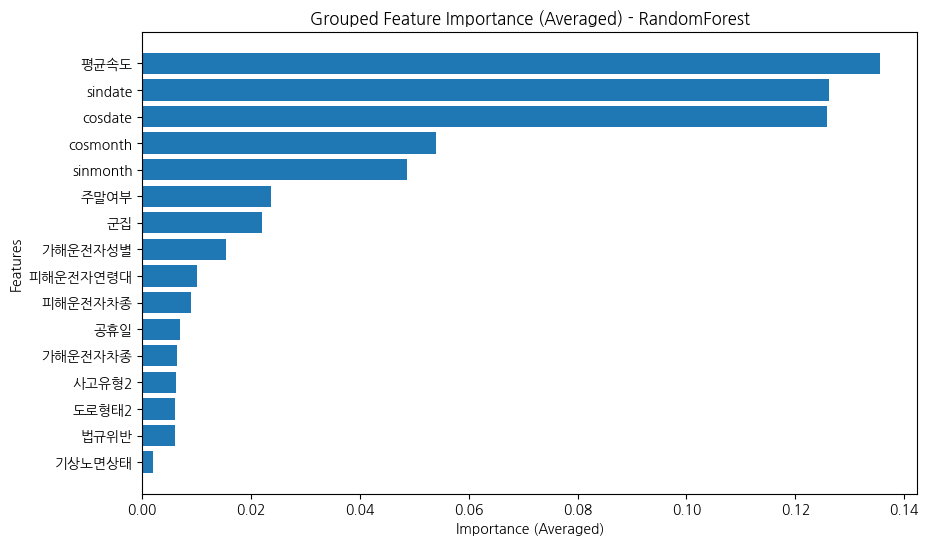


=== ExtraTrees ===
Training Accuracy: 1.0000
Train F1-Score: 1.0000
Train Recall: 1.0000
Test Accuracy: 0.7414
Test F1-Score: 0.7037
Test Recall: 0.7414

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.78      0.92      0.84      5352
     Class 1       0.43      0.20      0.27      1712

    accuracy                           0.74      7064
   macro avg       0.60      0.56      0.56      7064
weighted avg       0.69      0.74      0.70      7064

Potential Overfitting detected!


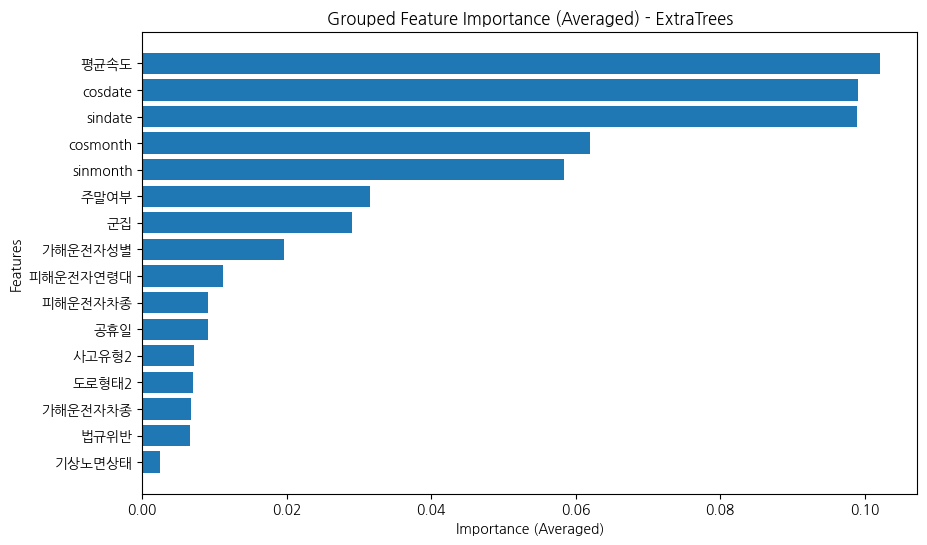


=== LightGBM ===
[LightGBM] [Info] Number of positive: 21405, number of negative: 21405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 42810, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training Accuracy: 0.7346
Train F1-Score: 0.7345
Train Recall: 0.7346
Test Accuracy: 0.6726
Test F1-Score: 0.6927
Test Recall: 0.6726

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.85      0.69      0.76      5352
     Class 1       0.39      0.62      0.48      1712

    accuracy                           0.67      7064
   macro avg       0.62      0.65      0.62      7064
weighted avg       0.74      0.67      0.69      7

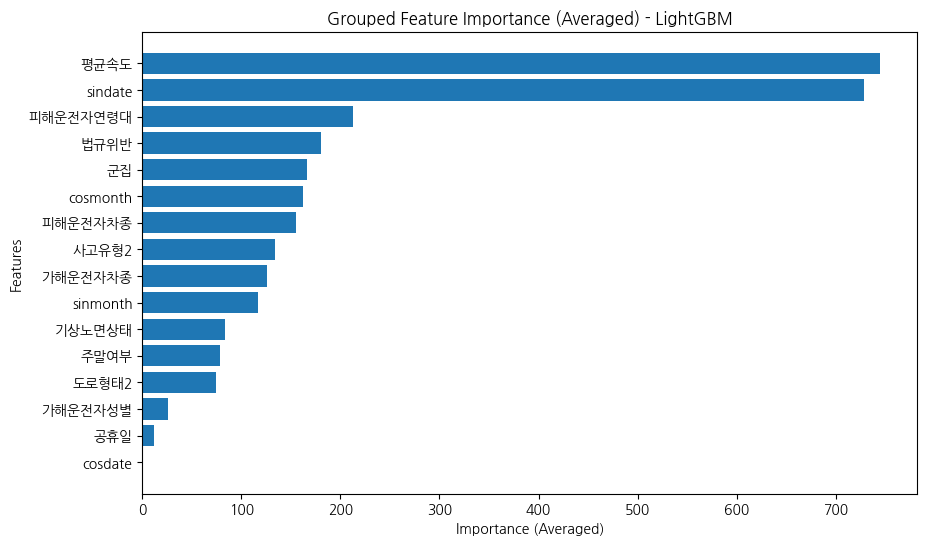


=== XGBoost ===


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:32:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.7957
Train F1-Score: 0.7956
Train Recall: 0.7957
Test Accuracy: 0.6775
Test F1-Score: 0.6941
Test Recall: 0.6775

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.83      0.72      0.77      5352
     Class 1       0.38      0.55      0.45      1712

    accuracy                           0.68      7064
   macro avg       0.61      0.63      0.61      7064
weighted avg       0.72      0.68      0.69      7064

Potential Overfitting detected!


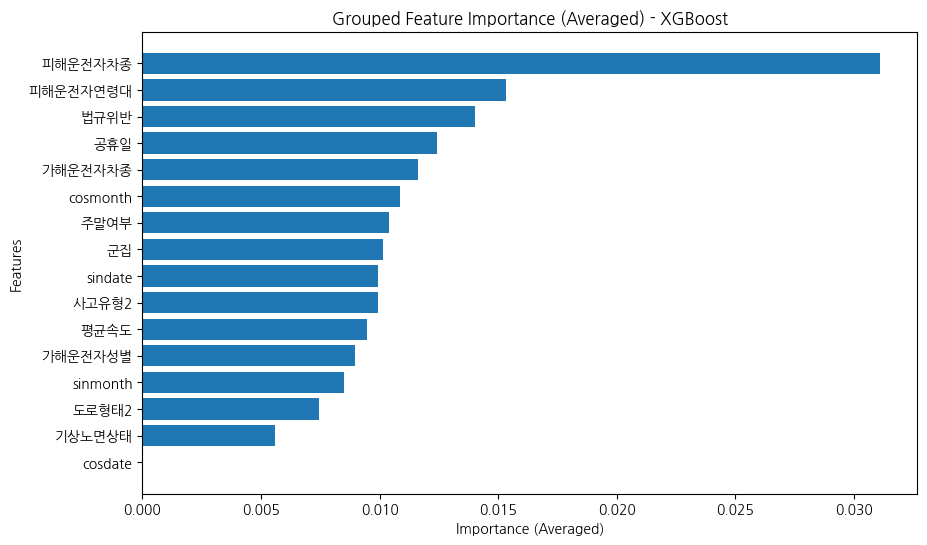


=== CatBoost ===
  verbose: 0
  cat_features: ['법규위반', '가해운전자차종', '피해운전자차종', '피해운전자연령대', '사고유형2', '도로형태2', '군집', '기상노면상태', '가해운전자성별', '주말여부', '공휴일']
Training Accuracy: 0.7720
Train F1-Score: 0.7719
Train Recall: 0.7720
Test Accuracy: 0.6854
Test F1-Score: 0.7010
Test Recall: 0.6854

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.84      0.73      0.78      5352
     Class 1       0.39      0.55      0.46      1712

    accuracy                           0.69      7064
   macro avg       0.61      0.64      0.62      7064
weighted avg       0.73      0.69      0.70      7064

Model is likely well-generalized.


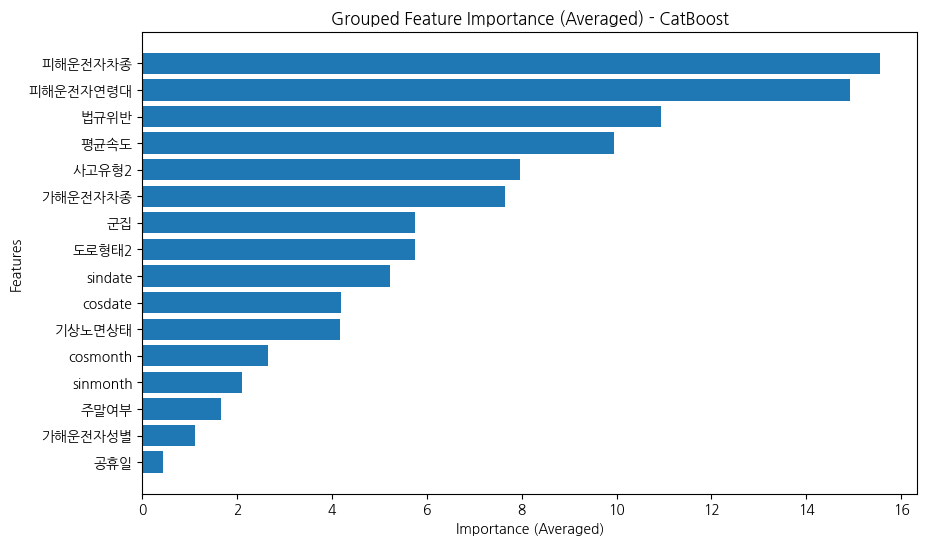

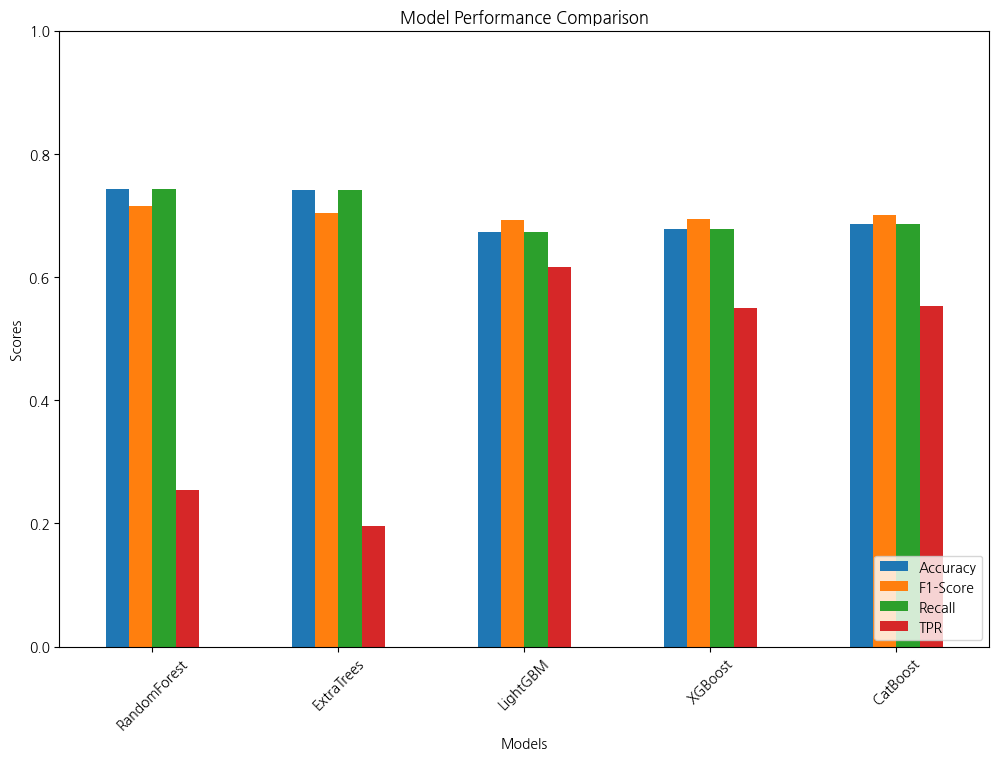

In [ ]:
from sklearn.metrics import f1_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import re
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score

# 특수 문자 제거 함수
def clean_feature_names(columns):
    return [re.sub(r'[^\w]', '_', col) for col in columns]

# 피처 이름 정리
X_train.columns = clean_feature_names(X_train.columns)
X_test.columns = clean_feature_names(X_test.columns)

# 원핫 인코딩된 컬럼 그룹화 (평균화)
def group_feature_importance_avg(feature_importances, column_names):
    grouped_importance = {}
    category_counts = {}

    for col, importance in zip(column_names, feature_importances):
        # 범주형 변수명 추출 (예: '기상상태_맑음' → '기상상태')
        group_name = col.split('_')[0]

        # 중요도 합산 및 카운트
        if group_name not in grouped_importance:
            grouped_importance[group_name] = 0
            category_counts[group_name] = 0
        grouped_importance[group_name] += importance
        category_counts[group_name] += 1

    # 평균 계산
    for group in grouped_importance:
        grouped_importance[group] /= category_counts[group]

    return pd.DataFrame({
        'Feature': grouped_importance.keys(),
        'Importance': grouped_importance.values()
    }).sort_values(by='Importance', ascending=False)

# 모델 정의
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Feature Importance 저장
grouped_feature_importances = {}

# 성능 저장
performance_metrics = {}

# 범주형 변수 지정
categorical_features = ['법규위반', '가해운전자차종', '피해운전자차종', '피해운전자연령대', '사고유형2', '도로형태2', '군집', '기상노면상태',
                        '가해운전자성별', '주말여부', '공휴일']

# 모델 학습 및 평가
for model_name, model in models.items():
    print(f"\n=== {model_name} ===")

    if model_name in ['CatBoost', 'LightGBM']:
        # LightGBM: 범주형 변수를 `category`로 변환
        if model_name == 'LightGBM':
            o_X_train[categorical_features] = o_X_train[categorical_features].astype('category')
            o_X_test[categorical_features] = o_X_test[categorical_features].astype('category')

        # CatBoost: cat_features를 모델 생성 시에 설정
        elif model_name == 'CatBoost':
            model = CatBoostClassifier(cat_features=categorical_features, verbose=0)

    # 모델 학습
    if model_name in ['CatBoost', 'LightGBM']:
        # LightGBM과 CatBoost는 원핫인코딩되지 않은 데이터를 사용
        model.fit(o_X_train, o_y_train)
    else:
        # 다른 모델은 원핫인코딩된 데이터를 사용
        model.fit(X_train, y_train)

    # 훈련 점수와 테스트 점수 계산
    if model_name in ['CatBoost', 'LightGBM']:
        train_accuracy = accuracy_score(o_y_train, model.predict(o_X_train))
        test_accuracy = accuracy_score(o_y_test, model.predict(o_X_test))
        train_f1 = f1_score(o_y_train, model.predict(o_X_train), average='weighted')
        test_f1 = f1_score(o_y_test, model.predict(o_X_test), average='weighted')
        train_recall = recall_score(o_y_train, model.predict(o_X_train), average='weighted')
        test_recall = recall_score(o_y_test, model.predict(o_X_test), average='weighted')
        target_recall = recall_score(o_y_test, model.predict(o_X_test))
        y_pred = model.predict(o_X_test)
    else:
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        train_f1 = f1_score(y_train, model.predict(X_train), average='weighted')
        test_f1 = f1_score(y_test, model.predict(X_test), average='weighted')
        train_recall = recall_score(y_train, model.predict(X_train), average='weighted')
        test_recall = recall_score(y_test, model.predict(X_test), average='weighted')
        target_recall = recall_score(y_test, model.predict(X_test))
        y_pred = model.predict(X_test)

    # 분류 리포트 생성
    report = classification_report(o_y_test if model_name in ['CatBoost', 'LightGBM'] else y_test, y_pred, target_names=['Class 0', 'Class 1'])

    # RandomForest 파라미터 확인
    if model_name in ['RandomForest', 'CatBoost']:
        for param, value in model.get_params().items():
            print(f"  {param}: {value}")

    # Feature Importance 계산
    if model_name == 'CatBoost':
        importance = model.get_feature_importance(prettified=False)
    else:
        importance = model.feature_importances_

    # 그룹화된 Feature Importance 계산 (평균화)
    grouped_importance = group_feature_importance_avg(importance, o_X_train.columns if model_name in ['CatBoost', 'LightGBM'] else X_train.columns)
    grouped_feature_importances[model_name] = grouped_importance

    # 결과 출력
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Train F1-Score: {train_f1:.4f}")
    print(f"Train Recall: {train_recall:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test F1-Score: {test_f1:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print("\nClassification Report:")
    print(report)

    # 오버피팅/언더피팅 여부 체크
    if abs(train_accuracy - test_accuracy) > 0.1:
        if train_accuracy > test_accuracy:
            print("Potential Overfitting detected!")
        else:
            print("Potential Underfitting detected!")
    else:
        print("Model is likely well-generalized.")

    # 성능 저장
    performance_metrics[model_name] = {
        'Train Accuracy': train_accuracy,
        'Train F1-Score': train_f1,
        'Train Recall': train_recall,
        'Accuracy': test_accuracy,
        'F1-Score': test_f1,
        'Recall': test_recall,
        'TPR': target_recall,
        'Classification Report': report
    }

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(grouped_importance['Feature'], grouped_importance['Importance'])
    plt.title(f'Grouped Feature Importance (Averaged) - {model_name}')
    plt.xlabel('Importance (Averaged)')
    plt.ylabel('Features')
    plt.gca().invert_yaxis()
    plt.show()

 # 성능 비교를 위한 데이터프레임 생성
performance_df = pd.DataFrame(performance_metrics).T[['Accuracy', 'F1-Score', 'Recall', 'TPR']]

# 성능 비교 plot 생성
performance_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

In [ ]:
# 최종 성능 요약
print("\n=== Performance Summary ===")
for model_name, metrics in performance_metrics.items():
    print(f"\n{model_name}:")
    print(f"  Train Accuracy: {metrics['Train Accuracy']:.4f}")
    print(f"  Train F1-Score: {metrics['Train F1-Score']:.4f}")
    print(f"  Train Recall: {metrics['Train Recall']:.4f}")
    print(f"  Test Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Test F1-Score: {metrics['F1-Score']:.4f}")
    print(f"  Test Recall: {metrics['Recall']:.4f}")


=== Performance Summary ===

RandomForest:
  Train Accuracy: 1.0000
  Train F1-Score: 1.0000
  Train Recall: 1.0000
  Test Accuracy: 0.7426
  Test F1-Score: 0.7156
  Test Recall: 0.7426

ExtraTrees:
  Train Accuracy: 1.0000
  Train F1-Score: 1.0000
  Train Recall: 1.0000
  Test Accuracy: 0.7414
  Test F1-Score: 0.7037
  Test Recall: 0.7414

LightGBM:
  Train Accuracy: 0.7346
  Train F1-Score: 0.7345
  Train Recall: 0.7346
  Test Accuracy: 0.6726
  Test F1-Score: 0.6927
  Test Recall: 0.6726

XGBoost:
  Train Accuracy: 0.7957
  Train F1-Score: 0.7956
  Train Recall: 0.7957
  Test Accuracy: 0.6775
  Test F1-Score: 0.6941
  Test Recall: 0.6775

CatBoost:
  Train Accuracy: 0.7720
  Train F1-Score: 0.7719
  Train Recall: 0.7720
  Test Accuracy: 0.6854
  Test F1-Score: 0.7010
  Test Recall: 0.6854


# 앙상블 모델

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import re
from sklearn.metrics import classification_report, accuracy_score

# 특수 문자 제거 함수
def clean_feature_names(columns):
    return [re.sub(r'[^\w]', '_', col) for col in columns]

# 피처 이름 정리
X_train.columns = clean_feature_names(X_train.columns)
X_test.columns = clean_feature_names(X_test.columns)

# 개별 모델 생성
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
lgbm = LGBMClassifier()
cat = CatBoostClassifier(verbose=0)
xgb = XGBClassifier()

# 앙상블 모델 생성

voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('et', et), ('lgbm', lgbm), ('cat', cat)],
    voting='soft',
    weights=[1, 1, 2, 2]  # 가중치 조정
)
# 학습 및 예측
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 21405, number of negative: 21405
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 42810, number of used features: 73
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
0.7177236693091733
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      5352
           1       0.42      0.43      0.43      1712

    accuracy                           0.72      7064
   macro avg       0.62      0.62      0.62      7064
weighted avg       0.72      0.72      0.72      7064



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

# 학습 데이터에 대한 예측
y_pred_train = voting_clf.predict(X_train)

# 학습 데이터 정확도 및 F1 Score
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train, average='weighted')

# 테스트 데이터 정확도 및 F1 Score
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='weighted')

# 결과 출력
print("Train Results:")
print(f"Train Accuracy: {train_accuracy}")
print(f"Train F1-Score: {train_f1}")

print("\nTest Results:")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test F1-Score: {test_f1}")

# Classification Report for Test Data
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred))

Train Results:
Train Accuracy: 0.9620882971268395
Train F1-Score: 0.9620853254929932

Test Results:
Test Accuracy: 0.7177236693091733
Test F1-Score: 0.7190391306833603

Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      5352
           1       0.42      0.43      0.43      1712

    accuracy                           0.72      7064
   macro avg       0.62      0.62      0.62      7064
weighted avg       0.72      0.72      0.72      7064



# UMAP

In [ ]:
!pip install umap-learn

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Explained Variance Ratio: [0.4710259 0.5289742]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


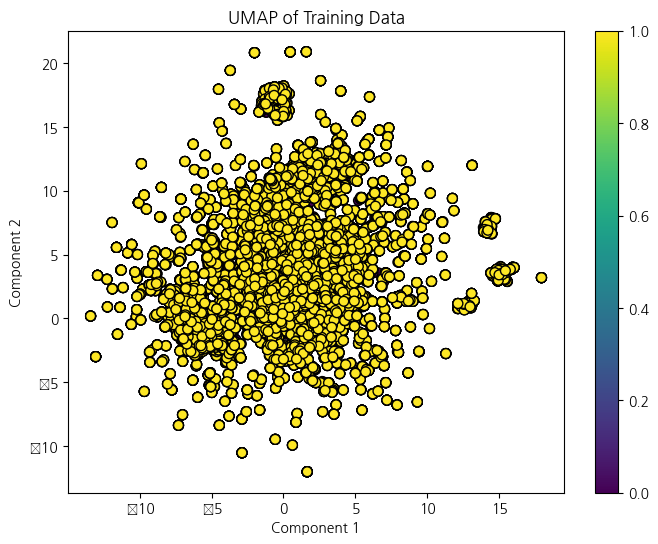

In [ ]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

# UMAP 모델 생성
umap_model = umap.UMAP(n_components=2, random_state=42)

# UMAP 변환
X_train_umap = umap_model.fit_transform(X_train)
X_test_umap = umap_model.transform(X_test)

# 결과 출력
explained_variance = np.var(X_train_umap, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print("Explained Variance Ratio:", explained_variance_ratio)

# 주성분 시각화 (2D)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('UMAP of Training Data')
plt.colorbar()
plt.show()

In [ ]:
#randomforest 적용
rf = RandomForestClassifier(
    bootstrap= True,
    ccp_alpha= 0.0,
    class_weight= None,
    criterion= 'gini',
    max_depth= 20,
    max_features= 'sqrt',
    max_leaf_nodes= None,
    max_samples= None,
    min_impurity_decrease= 0.0,
    min_samples_leaf= 1,
    min_samples_split= 5,
    min_weight_fraction_leaf= 0.0,
    monotonic_cst= None,
    n_estimators= 100,
    n_jobs= -1,
    oob_score= False,
    random_state= 42,
    verbose= 0,
    warm_start= False,
)

rf.fit(X_train_umap, y_train)
y_pred = rf.predict(X_test_umap)

# 훈련 점수와 테스트 점수 계산

train_accuracy = accuracy_score(y_train, rf.predict(X_train_umap))
test_accuracy = accuracy_score(y_test, rf.predict(X_test_umap))
train_f1 = f1_score(y_train, rf.predict(X_train_umap), average='weighted')
test_f1 = f1_score(y_test, rf.predict(X_test_umap), average='weighted')
train_recall = recall_score(y_train, rf.predict(X_train_umap), average='weighted')
test_recall = recall_score(y_test, rf.predict(X_test_umap), average='weighted')
y_pred = rf.predict(X_test_umap)
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

# 결과 출력
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Train F1-Score: {train_f1:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print("\nClassification Report:")
print(report)

Training Accuracy: 0.9099
Train F1-Score: 0.9098
Train Recall: 0.9099
Test Accuracy: 0.6731
Test F1-Score: 0.6795
Test Recall: 0.6731

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.80      0.76      0.78      5352
     Class 1       0.35      0.39      0.37      1712

    accuracy                           0.67      7064
   macro avg       0.57      0.58      0.57      7064
weighted avg       0.69      0.67      0.68      7064



# 파라미터 최적화

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'depth': 8, 'grow_policy': 'SymmetricTree', 'learning_rate': 0.015930522616241012, 'min_child_samples': 24}
Training Accuracy: 0.7587
Train F1-Score: 0.7585
Train Recall: 0.7587
Test Accuracy: 0.6747
Test F1-Score: 0.6931
Test Recall: 0.6747

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      5352
           1       0.39      0.58      0.46      1712

    accuracy                           0.67      7064
   macro avg       0.61      0.64      0.61      7064
weighted avg       0.73      0.67      0.69      7064



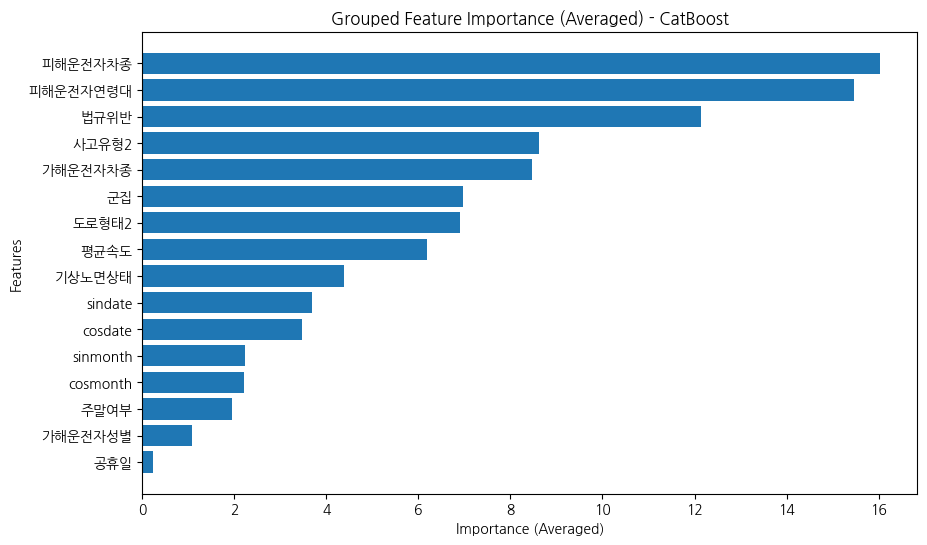

In [ ]:
import catboost
from catboost import Pool
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, loguniform

# CatBoost 분류기 생성
model_cat = catboost.CatBoostClassifier(cat_features=categorical_features, verbose=0, random_state=42, eval_metric='F1')

train_pool = Pool(data=o_X_train, label=o_y_train, cat_features=categorical_features)
test_pool = Pool(data=o_X_test, label=o_y_test, cat_features=categorical_features)

param = {
    "learning_rate": loguniform(1e-3, 0.1),
    "depth": randint(1, 10),
    "min_child_samples": randint(1, 40),
    "grow_policy": ['SymmetricTree', 'Depthwise', 'Lossguide'],
}

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(model_cat, param, n_iter=4, cv=5, random_state=42, n_jobs=-1, verbose=2)
random_search.fit(o_X_train, o_y_train)

# 최적의 파라미터 출력
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# 최적 파라미터로 모델 생성
model_cat = random_search.best_estimator_

# 모델 훈련
model_cat.fit(train_pool)

# 성능 평가 함수
def evaluate_model(model, train_pool, test_pool):
    train_preds = model.predict(train_pool)
    test_preds = model.predict(test_pool)

    train_accuracy = accuracy_score(train_pool.get_label(), train_preds)
    test_accuracy = accuracy_score(test_pool.get_label(), test_preds)

    train_f1 = f1_score(train_pool.get_label(), train_preds, average='weighted')
    test_f1 = f1_score(test_pool.get_label(), test_preds, average='weighted')

    train_recall = recall_score(train_pool.get_label(), train_preds, average='weighted')
    test_recall = recall_score(test_pool.get_label(), test_preds, average='weighted')

    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Train F1-Score: {train_f1:.4f}")
    print(f"Train Recall: {train_recall:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test F1-Score: {test_f1:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print("\nClassification Report:")
    print(classification_report(test_pool.get_label(), test_preds))

    return model

model_cat = evaluate_model(model_cat, train_pool, test_pool)

# 특성 중요도
importance = model_cat.get_feature_importance(prettified=False)
grouped_importance = group_feature_importance_avg(importance, o_X_train.columns)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(grouped_importance['Feature'], grouped_importance['Importance'])
plt.title(f'Grouped Feature Importance (Averaged) - CatBoost')
plt.xlabel('Importance (Averaged)')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

# 특성 중요도 상위 3개 feature 각 카테고리별 분석

In [ ]:
# 가장 중요한 Feature 추출
feature_importances = model_cat.get_feature_importance(prettified=False)
important_features = pd.DataFrame({
    "Feature": o_X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print("Top Features:")
print(important_features.head())


Top Features:
     Feature  Importance
3    피해운전자차종   16.037864
4   피해운전자연령대   15.460762
0       법규위반   12.138889
12     사고유형2    8.613816
1    가해운전자차종    8.459587


In [ ]:
plt.rc('axes', unicode_minus=False)

<ipython-input-78-7677e0e655b7>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  }).groupby("Category").mean().sort_values(by="SHAP Value", ascending=False)



Category-wise SHAP Value Analysis for 피해운전자차종
               SHAP Value
Category                 
이륜               0.461984
자전거              0.419675
원동기              0.407028
개인형이동수단(PM)      0.319831
보행자              0.296363
정보 없음 (차량 단독)    0.260124
승합              -0.127646
기타              -0.192683
승용              -0.520594
화물              -0.571971
건설기계            -0.678015


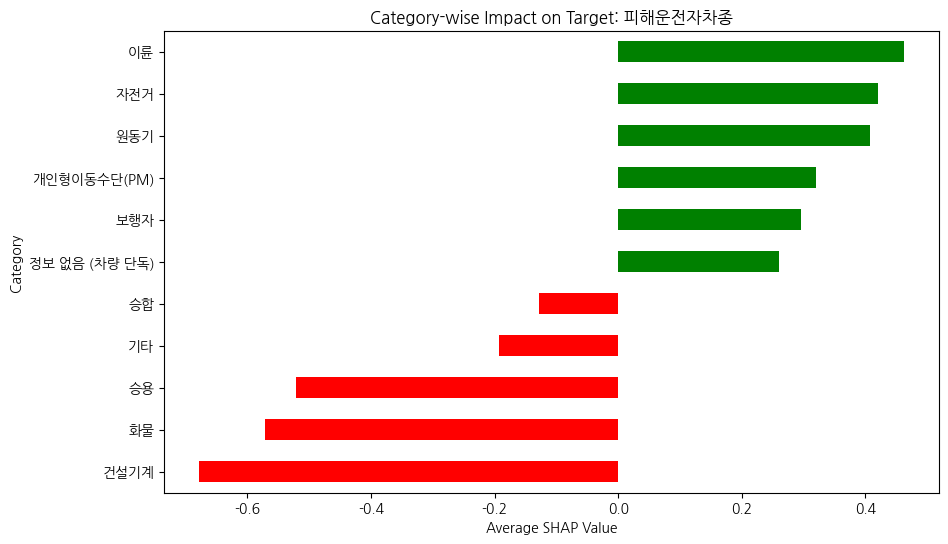

<ipython-input-78-7677e0e655b7>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  }).groupby("Category").mean().sort_values(by="SHAP Value", ascending=False)



Category-wise SHAP Value Analysis for 피해운전자연령대
               SHAP Value
Category                 
65세 이상           0.391935
51-60세           0.125890
61-64세           0.124189
정보 없음 (차량 단독)    0.013928
41-50세          -0.156222
31-40세          -0.185181
13-20세          -0.288701
21-30세          -0.328702
12세 이하          -0.621989


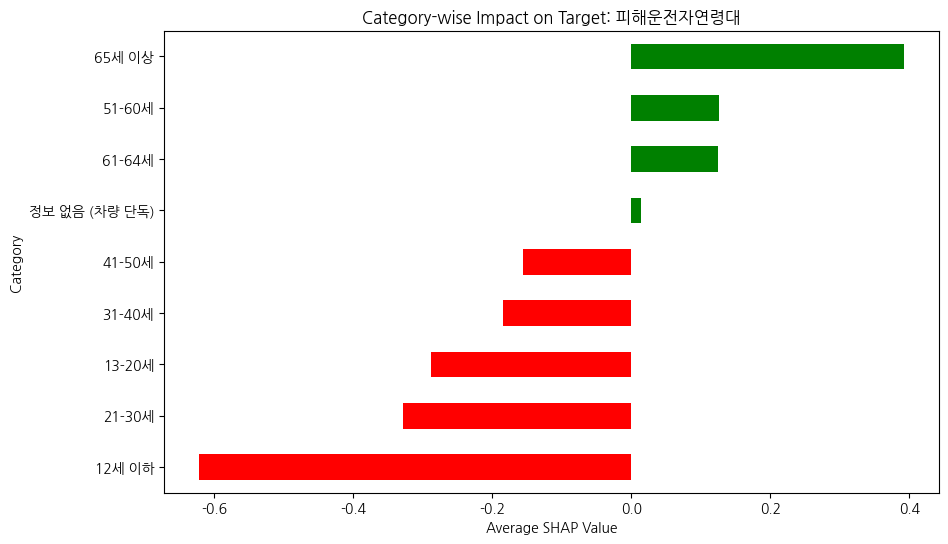

<ipython-input-78-7677e0e655b7>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  }).groupby("Category").mean().sort_values(by="SHAP Value", ascending=False)



Category-wise SHAP Value Analysis for 법규위반
           SHAP Value
Category             
과속           0.829155
신호위반         0.426460
중앙선침범        0.405231
보행자보호의무위반    0.188103
기타           0.097199
안전운전불이행     -0.123311
직진우회전진행방해   -0.123988
안전거리미확보     -0.160491
불법유턴        -0.204547
교차로운행방법위반   -0.208349
차로위반        -0.287965


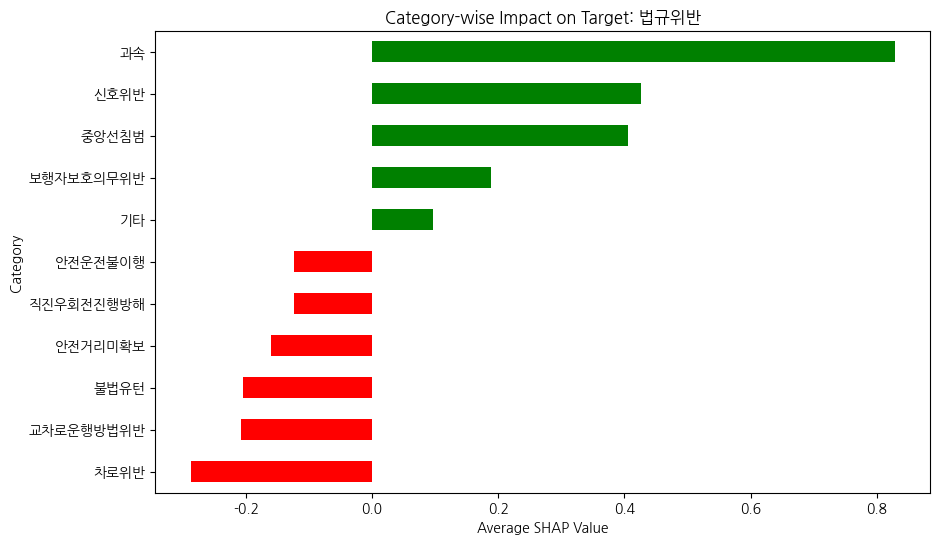

In [ ]:
# SHAP 값 계산
shap_values = model_cat.get_feature_importance(type="ShapValues", data=test_pool)
shap_values = shap_values[:, :-1]  # 마지막 열은 Baseline 값

# 가장 중요한 Feature 3개 추출
important_features = pd.DataFrame({
    "Feature": o_X_train.columns,
    "Importance": model_cat.get_feature_importance(prettified=False)
}).sort_values(by="Importance", ascending=False)

top_features = important_features.iloc[:3]  # 상위 3개 Feature 선택

# 상위 3개의 Feature 반복 분석
for feature in top_features["Feature"]:
    feature_index = o_X_train.columns.get_loc(feature)

    # 특정 Feature의 SHAP 값 분석
    important_shap_values = shap_values[:, feature_index]
    categories = o_X_test[feature]

    category_shap_analysis = pd.DataFrame({
        "Category": categories,
        "SHAP Value": important_shap_values
    }).groupby("Category").mean().sort_values(by="SHAP Value", ascending=False)

    # 결과 출력
    print(f"\nCategory-wise SHAP Value Analysis for {feature}")
    print(category_shap_analysis)

    # 가로 막대그래프 시각화
    plt.figure(figsize=(10, 6))
    # 컬러 지정 조건 수정
    colors = ['green' if val > 0 else 'red' for val in category_shap_analysis['SHAP Value'].values]
    # 가로 막대그래프
    category_shap_analysis['SHAP Value'].plot(kind='barh', legend=False, color=colors)
    plt.title(f"Category-wise Impact on Target: {feature}")
    plt.xlabel("Average SHAP Value")
    plt.ylabel("Category")
    plt.gca().invert_yaxis()  # 높은 값이 위로 오도록 역순 정렬
    plt.show()